<a href="https://colab.research.google.com/github/Michell203/DingLab/blob/main/DLabCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.2 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=8284de082eaf8741e9605528a5cdb50183609556ebc1eccc2fadd4db538e5078
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import scipy
import matplotlib.pyplot as plt

import math
import random
from random import randrange
import itertools

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split, Subset

from google.colab import drive
# from scipy.special import softmax

# https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html - Scanpy preprocess
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.read_h5ad.html - Scanpy h5ad
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.read_10x_h5.html - Scanpy 10x h5
# https://scanpy.readthedocs.io/en/stable/index.html - Scanpy webpage

# https://www.partek.com/webinar/understanding-data-formats-and-preprocessing/
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Preprocess
Get a sense of the data (GSM4504959_E12.5_filtered_gene_bc_matrices.h5)

Cell count: 9792,
Gene count: 27998

In [ ]:
t1 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504959_E12.5_filtered_gene_bc_matrices.h5")
t1.var_names_make_unique()
print(t1.X)

In [ ]:
array = t1.X.toarray()
number = 0
for i in range(9791):
  number += array[i,27997]
mean_of_gene1 = number/9791
print(mean_of_gene1)

0.0013277499744663466


In [ ]:
t1.X

<9792x27998 sparse matrix of type '<class 'numpy.float32'>'
	with 25041018 stored elements in Compressed Sparse Row format>

In [ ]:
sc.pp.normalize_total(t1, target_sum=1e4)

In [ ]:
pseudobulk_h5_file_1 = t1.X.mean(axis=0)
print(pseudobulk_h5_file_1)

[[0.00113179 0.         0.         ... 0.10274449 0.000142   0.00174793]]


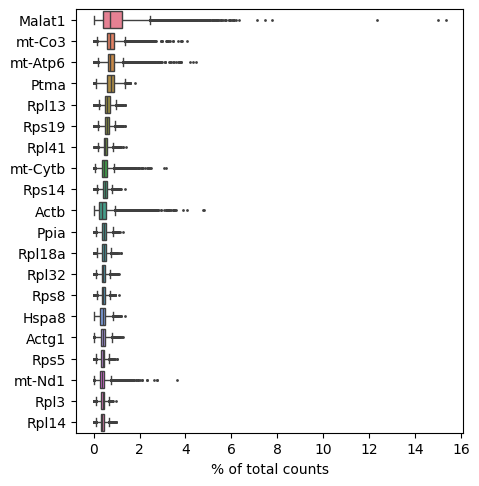

None


In [ ]:
print(sc.pl.highest_expr_genes(t1, n_top=20, ))

In [ ]:
sc.pp.normalize_total(t1, target_sum=1e4)
# sc.pp.log1p(t1)

In [ ]:
pseudobulk_t1 = t1.X.mean(axis=0)
print(pseudobulk_t1)

[[0.00113179 0.         0.         ... 0.10274448 0.000142   0.00174793]]


In [ ]:
# Generate new information about counts
t1.var_names_make_unique()
sc.pp.calculate_qc_metrics(t1, log1p=False, inplace=True)

frame1_obs = pd.DataFrame(t1.obs)
frame1_obs.drop(['pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'], axis=1)

frame1_vars = pd.DataFrame(t1.var)

In [ ]:
t1.layers["t1.X"] = t1.X
t1.to_df(layer="t1.X")

,Xkr4,Gm1992,Gm37381,Rp1,Rp1-1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,PISD,DHRSX,Vmn2r122,CAAA01147332.1
AAACCTGAGAACTGTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
AAACCTGAGACCACGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
AAACCTGAGACCCACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.8082,0.0,0.0,0.0
AAACCTGAGACTAGAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.686006,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
AAACCTGAGCCGATTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.892864,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTAGCTGCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
TTTGTCAGTCTTGATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
TTTGTCAGTTGCGCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
TTTGTCATCATGCATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.098853,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0


# Create Pseudobulk

In [4]:
t0 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504959_E12.5_filtered_gene_bc_matrices.h5")
t1 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504960_E15.5_filtered_gene_bc_matrices.h5")
t2 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504961_E17.5_filtered_gene_bc_matrices.h5")
t3 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504962_P3_filtered_gene_bc_matrices.h5")
t4 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504963_P7_filtered_gene_bc_matrices.h5")
t5 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504964_P15_filtered_gene_bc_matrices.h5")
t6 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504965_P42_filtered_gene_bc_matrices.h5")

sc.pp.normalize_total(t0, target_sum=1e4)
sc.pp.normalize_total(t1, target_sum=1e4)
sc.pp.normalize_total(t2, target_sum=1e4)
sc.pp.normalize_total(t3, target_sum=1e4)
sc.pp.normalize_total(t4, target_sum=1e4)
sc.pp.normalize_total(t5, target_sum=1e4)
sc.pp.normalize_total(t6, target_sum=1e4)

h5_files = [t0, t1, t2, t3, t4, t5, t6]
pseudo_bulks = []

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_name

In [5]:
t0.var_names
max_value = t0.X.max()
print(max_value)

5743.3667


In [6]:
def pseudo_bulk(h5_file): # Creates pseudobulk of h5 file
  sc.pp.normalize_total(h5_file, target_sum=1e4)
  pseudobulk_h5_file = h5_file.X.mean(axis=0)

  values = []
  for i in range(pseudobulk_h5_file.shape[1]):
    values.append(pseudobulk_h5_file[0,i])

  return np.array(values)

In [7]:
def create_pseudo_bulk(h5_files): # Generates pseudobulk from all time-stamps
  pseudo_bulks = []
  for h5_file in h5_files:
    pseudo_h5 = pseudo_bulk(h5_file)
    pseudo_bulks.append(pseudo_h5)

  return np.array(pseudo_bulks)

In [8]:
obs_names = {} # For .obs of bulk AnnData object
for i in range(len(h5_files)): # 7
  obs_names[i] = "TimeStamp" + str(i)
obs_frame = pd.DataFrame(list(obs_names.items()), columns=['Index', 'TimeStamp'])
print(obs_frame)

   Index   TimeStamp
0      0  TimeStamp0
1      1  TimeStamp1
2      2  TimeStamp2
3      3  TimeStamp3
4      4  TimeStamp4
5      5  TimeStamp5
6      6  TimeStamp6


In [9]:
bulks = create_pseudo_bulk(h5_files)
bulks_adata = ad.AnnData(bulks, obs=obs_frame, var=t0.var)

/usr/local/lib/python3.10/dist-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [10]:
print(bulks_adata.X)
print(bulks_adata.obs)
print(bulks_adata.var)

[[1.1317938e-03 0.0000000e+00 0.0000000e+00 ... 1.0274448e-01
  1.4200195e-04 1.7479266e-03]
 [3.7995083e-04 0.0000000e+00 1.0629904e-04 ... 1.1197486e-01
  1.0389585e-04 3.8963489e-03]
 [2.5405546e-04 0.0000000e+00 0.0000000e+00 ... 1.2159945e-01
  0.0000000e+00 7.9007307e-03]
 ...
 [6.2037073e-04 2.2444893e-04 3.1621216e-04 ... 2.7425325e-01
  0.0000000e+00 1.4634721e-02]
 [0.0000000e+00 0.0000000e+00 9.7656899e-05 ... 1.2613006e-01
  0.0000000e+00 1.4958507e-02]
 [1.0511717e-03 0.0000000e+00 1.1555251e-03 ... 1.4415525e-01
  0.0000000e+00 1.6579513e-02]]
   Index   TimeStamp
0      0  TimeStamp0
1      1  TimeStamp1
2      2  TimeStamp2
3      3  TimeStamp3
4      4  TimeStamp4
5      5  TimeStamp5
6      6  TimeStamp6
                          gene_ids
Xkr4            ENSMUSG00000051951
Gm1992          ENSMUSG00000089699
Gm37381         ENSMUSG00000102343
Rp1             ENSMUSG00000025900
Rp1             ENSMUSG00000109048
...                            ...
AC168977.1      ENSMUSG

In [11]:
bulks_adata.obs['files'] = ['GSM4504959_E12.5_filtered_gene_bc_matrices.h5', 'GSM4504960_E15.5_filtered_gene_bc_matrices.h5',
                            'GSM4504961_E17.5_filtered_gene_bc_matrices.h5', 'GSM4504962_P3_filtered_gene_bc_matrices.h5',
                            'GSM4504963_P7_filtered_gene_bc_matrices.h5', 'GSM4504964_P15_filtered_gene_bc_matrices.h5',
                            'GSM4504965_P42_filtered_gene_bc_matrices.h5']

In [12]:
bulks_adata.var['gene_ids']

Xkr4              ENSMUSG00000051951
Gm1992            ENSMUSG00000089699
Gm37381           ENSMUSG00000102343
Rp1               ENSMUSG00000025900
Rp1               ENSMUSG00000109048
                         ...        
AC168977.1        ENSMUSG00000079808
PISD              ENSMUSG00000095041
DHRSX             ENSMUSG00000063897
Vmn2r122          ENSMUSG00000096730
CAAA01147332.1    ENSMUSG00000095742
Name: gene_ids, Length: 27998, dtype: object

In [13]:
bulks_adata.obs['files']

0    GSM4504959_E12.5_filtered_gene_bc_matrices.h5
1    GSM4504960_E15.5_filtered_gene_bc_matrices.h5
2    GSM4504961_E17.5_filtered_gene_bc_matrices.h5
3       GSM4504962_P3_filtered_gene_bc_matrices.h5
4       GSM4504963_P7_filtered_gene_bc_matrices.h5
5      GSM4504964_P15_filtered_gene_bc_matrices.h5
6      GSM4504965_P42_filtered_gene_bc_matrices.h5
Name: files, dtype: object

In [14]:
def pick_gene(gene_no, gene_database=bulks_adata):
  return gene_database.X[:, gene_no]

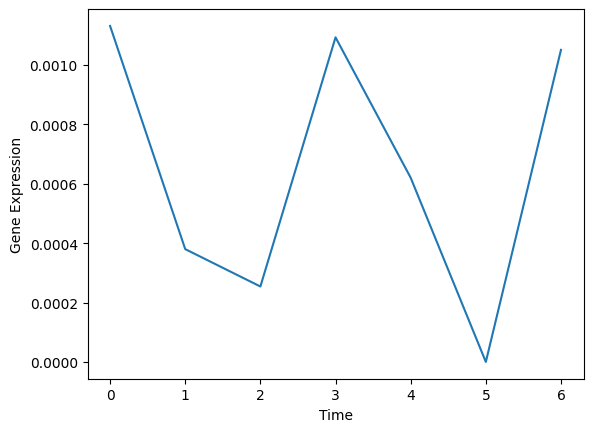

In [15]:
# Look at time series patterns of a selected gene
gene_timeseries = pick_gene(0)
def plot_geneseries(gene):
  length = [x for x in range(len(gene))]
  plt.plot(length, gene)
  plt.xlabel('Time')
  plt.ylabel('Gene Expression')

plot_geneseries(gene_timeseries)

# Model

### KNN Function
Find neighboring genes

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [16]:
k = 50
k += 1
neighbors = NearestNeighbors(n_neighbors=k) # k = x, x-1 neighbors
neighbors.fit(bulks_adata.X.T)

def find_neighbors(g, neighbors_func=neighbors, gene_database=bulks_adata):
  neighbor_arr = neighbors_func.kneighbors([g])
  return neighbor_arr[1][0][1:]

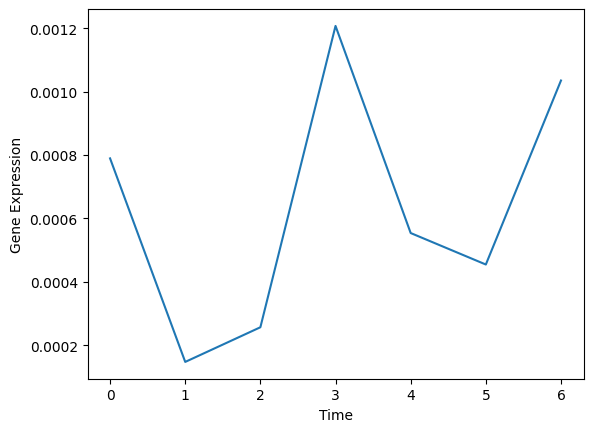

In [17]:
# Check, do the time series looks similar?
gene_0 = pick_gene(0)
gene0_neighbors = find_neighbors(gene_0)
plot_geneseries(pick_gene(gene0_neighbors[1]))

### Data Preprocessing

In [18]:
# Format input for NN
def format_input(g, gene_database=bulks_adata): # Shape input to our desired format: [g1,...,gt,n1,...,nt,1,2,...,t]
  """
    format_input formats the input for the NN

    :param g: Gene expression values for single gene g
    :param gene_database: Database to pull gene expressions from

    :return: Formatted input, with genes and neighbors as features
  """
  neighbors = find_neighbors(g, gene_database=gene_database) # Get indices of all neighbors of g
  input = np.array(g)

  for n in neighbors:
    neighbor_gene = np.array(pick_gene(n))
    input = np.concatenate((input, neighbor_gene), axis=None) # Concat neighbors with original gene

  return input

gene0 = format_input(pick_gene(0))

In [19]:
# Do multiple dimensions. For later

# def pos_enc(max_TS, d_model=1, n=1000.0): # Taken from https://nlp.seas.harvard.edu/2018/04/03/attention.html#positional-encoding
#   pe = torch.zeros(max_TS, d_model)

#   position = torch.arange(0, max_TS).unsqueeze(1)
#   div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(n) / d_model))

#   pe[:, 0::2] = torch.sin(position * div_term)
#   pe[:, 1::2] = torch.cos(position * div_term)

#   pe = pe.unsqueeze(0)
#   pe = pe.flatten()

#   return pe

# print(pos_enc(7))

In [20]:
all_inputs = [] # All inputs, formatted, not scaled
# int_time_embeddings = [x for x in range(bulks_adata.obs.shape[0])] # Time embeddings for each gene
# time_embeddings = pos_enc(bulks_adata.obs.shape[0])

time_embeddings = [x for x in range(bulks_adata.obs.shape[0])]

# time_embeddings = [x for x in range(bulks_adata.obs.shape[0])] # JUST FOR TESTING

for i in range( int(len(bulks_adata.var)) ):
  # Pick gene and format the input
  gene_i = pick_gene(i)
  formatted_input = format_input(gene_i)

  all_inputs.append(formatted_input)

In [21]:
# Masking mechanism
def mask(time_points, input, mask_value=np.NINF, gene_database=bulks_adata): # Time points start form 0. Time points is of type array
  """
    mask is function to mask inputs

    :param time_points: Array. What time points to mask
    :param input: Input array to be masked
    :param gene_database: Database to pull gene expressions from

    :return: Masked array and masked values separately. Masked array has masked index appended to end.
  """
  new_arr = input.copy()
  max_timepoints = bulks_adata.obs.shape[0]
  masked = []

  first_y = []

  for n in range(len(input)):
    ts_mask = n % max_timepoints

    if ts_mask in time_points: # Mask each time-point for every neighbour
      masked.append(new_arr[n])

      if ts_mask == time_points[0]:
        first_y.append(new_arr[n])

      new_arr[n] = mask_value  # Masked with -inf by default

  # new_arr = np.append(new_arr, time_embeddings[time_points[0]])
  new_arr = np.append(new_arr, time_points[0])

  return new_arr, first_y

test, masked = mask([2, 1, 3], gene0)
# print(gene0)
# print(test, masked)

In [22]:
# X_train_note, X_test_note = train_test_split(all_inputs, train_size=0.8, shuffle=False) # 80/20 Split all inputs
X_train_note, X_test_note = train_test_split(all_inputs, train_size=0.8, shuffle=True) # 80/20 Split all inputs

In [23]:
# print(X_train_note[200])

In [24]:
scaler = StandardScaler() # Standard scaler for inputs
X_train_note = scaler.fit_transform(X_train_note)
X_test_note = scaler.transform(X_test_note)

In [25]:
all_data = [] # After scaling, append time embeddings
# time_embeddings = [x for x in range(bulks_adata.obs.shape[0])]
for i in range(len(X_train_note)):
  all_data.append( np.append(X_train_note[i], time_embeddings) )

for i in range( len(X_test_note) ):
  all_data.append( np.append(X_test_note[i], time_embeddings) )

In [26]:
X_train = []
X_test = []

for i in range(int(len(all_data) * 0.8)): # 80%, 20% split
  X_train.append( all_data[i] )

for i in range(int(len(all_data) * 0.8)+1, len(all_data)):
  X_test.append( all_data[i] )

In [27]:
# print(X_train[0])

In [28]:
def generate_combintations(n, time_points=time_embeddings):
  """
    generate_combintations generates combinations for masking of time points of length n.
    First element is masked and to be predicted, rest are masked.
    Function generates special kind of permutation where only order of first element matters.

    :param time_points: Max number of time points
    :param n: Length of combination (number of time points to mask)

    :return: List of combinations
  """
  combinations = []
  to_skip = int(math.factorial(n-1))-1 # Want only permutations where first number is different, skip the rest
  skipped = to_skip

  # time_array = [x for x in range(time_points)]

  for comb in itertools.combinations(time_points, n): # Generate combinations of length n
    to_avg = [] # Group together permutations that will be averaged in the end

    for permutation in list(itertools.permutations(comb)): # Generate permutations of those combinations
      if skipped > 0: # Dont want all permutations
        skipped -= 1
        continue

      to_avg.append(list(permutation))

      skipped = to_skip

    combinations.append(to_avg)

    # e.g. combinations[0] has lists of size n. Caluclate MAE for predictions of all of them, take average.

  return combinations
# generate_combintations(3)

In [29]:
def gen_loader(X_train, n):
  '''
  Generate training for Regressor NN
  '''
  X_train_loader = []
  i = 0
  while i < len(X_train)-1:

    for comb in generate_combintations(n):
      loader = []
      for seq in comb:

        if i > len(X_train)-1:
          break

        masked, y = mask(seq, X_train[i])
        masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)
        arr = [masked, y]

        loader.append(arr)

      X_train_loader.append(loader)
      i += 1

  return X_train_loader

In [30]:
print(len(gen_loader(X_train, 1)))

22400


In [31]:
print(len(X_train))
print(len(X_test))

22398
5599


In [32]:
X_train_loader = []
AE_train_loader = []
AE_test_loader = []

for i in range(1, len(time_embeddings)):
  random.shuffle(X_train)
  gen_i = gen_loader(X_train, i)

  X_train_loader.extend( gen_i )

  random.shuffle(gen_i)
  # print(len(gen_i))
  # random_indices = torch.randperm(len(gen_i))
  # random_indices_int = [x.item() for x in random_indices]
  # gen_i = gen_i[random_indices_int]

  for j in gen_i[:len(gen_i)//2]:
    AE_train_loader.extend( j )

  random.shuffle(X_test)
  gen_i_test = gen_loader(X_test, i)
  random.shuffle(gen_i_test)

  for t in gen_i_test:
    AE_test_loader.extend( t )

random.shuffle(X_train_loader)
random.shuffle(AE_train_loader)

In [33]:
print(len(X_train_loader))
print(len(AE_train_loader))
print(X_train_loader[1001])

134414
235150
[[tensor([   -inf,    -inf,    -inf, -0.0620, -0.0741,    -inf, -0.0415,    -inf,
           -inf,    -inf, -0.0850, -0.0765,    -inf, -0.0767,    -inf,    -inf,
           -inf, -0.0953, -0.1123,    -inf, -0.0908,    -inf,    -inf,    -inf,
        -0.1067, -0.1099,    -inf, -0.0887,    -inf,    -inf,    -inf, -0.1100,
        -0.1179,    -inf, -0.0837,    -inf,    -inf,    -inf, -0.1159, -0.1143,
           -inf, -0.1072,    -inf,    -inf,    -inf, -0.1073, -0.1102,    -inf,
        -0.1072,    -inf,    -inf,    -inf, -0.1037, -0.1171,    -inf, -0.0719,
           -inf,    -inf,    -inf, -0.0961, -0.1131,    -inf, -0.0778,    -inf,
           -inf,    -inf, -0.1104, -0.1140,    -inf, -0.1043,    -inf,    -inf,
           -inf, -0.1126, -0.1319,    -inf, -0.1169,    -inf,    -inf,    -inf,
        -0.1058, -0.1018,    -inf, -0.0803,    -inf,    -inf,    -inf, -0.1301,
        -0.1213,    -inf, -0.0744,    -inf,    -inf,    -inf, -0.1051, -0.1103,
           -inf, -0.1020

In [34]:
for batch in AE_train_loader:
  print(batch)
  break
# print(AE_train_loader[0])
# print(AE_train_loader[3])

[tensor([   -inf,    -inf,    -inf,    -inf, -0.1075,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf, -0.1289,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf, -0.1842,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf, -0.1801,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
        -0.1839,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf, -0.1899,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf, -0.1913,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf, -0.1945,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf, -0.1940,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf, -0.1968,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf, -0.1981,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf, -0.2019,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
        -0.1973,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf, -0.1960,
           -inf,    -inf,    -inf,    -

In [35]:
# X_test_loader = []

# X_test_loader1 = gen_loader(X_test, 1)[0]
# X_test_loader1 = gen_loader(X_test, 2)[0]
# X_test_loader1 = gen_loader(X_test, 3)[0]
# X_test_loader1 = gen_loader(X_test, 4)[0]
# X_test_loader1 = gen_loader(X_test, 5)[0]
# X_test_loader1 = gen_loader(X_test, 6)[0]

In [36]:
class GeneDatasetAE(torch.utils.data.Dataset):
  # Characterizes a dataset for PyTorch
  def __init__(self, X):
        # self.genes = genes
        self.X = X
        # self.X = torch.tensor(X, dtype=torch.float32)
        # self.y = y.detach().clone()

  def __len__(self):
        return len(self.X)

  def __getitem__(self, index):
        # Generates one sample of data
        gene = self.X[index]

        return gene

In [37]:
AEgeneTrainSet = GeneDatasetAE(AE_train_loader)
AE_train_loader_x = DataLoader(AEgeneTrainSet, shuffle=True, batch_size=3)

AEgeneTestSet = GeneDatasetAE(AE_train_loader)
AE_test_loader_X = DataLoader(AEgeneTestSet, shuffle=True, batch_size=3)

# RGgeneTrainSet = GeneDatasetAE(X_train_loader)
# RG_train_loader_x = DataLoader(RGgeneTrainSet, shuffle=True, batch_size=3)

# RGgeneTestSet = GeneDatasetAE(AE_train_loader)
# RG_test_loader_X = DataLoader(RGgeneTestSet, shuffle=True, batch_size=3)

In [38]:
AEgeneTrainSet.__getitem__(0)

[tensor([   -inf,    -inf,    -inf,    -inf, -0.1075,    -inf,    -inf,    -inf,
            -inf,    -inf,    -inf, -0.1289,    -inf,    -inf,    -inf,    -inf,
            -inf,    -inf, -0.1842,    -inf,    -inf,    -inf,    -inf,    -inf,
            -inf, -0.1801,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
         -0.1839,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf, -0.1899,
            -inf,    -inf,    -inf,    -inf,    -inf,    -inf, -0.1913,    -inf,
            -inf,    -inf,    -inf,    -inf,    -inf, -0.1945,    -inf,    -inf,
            -inf,    -inf,    -inf,    -inf, -0.1940,    -inf,    -inf,    -inf,
            -inf,    -inf,    -inf, -0.1968,    -inf,    -inf,    -inf,    -inf,
            -inf,    -inf, -0.1981,    -inf,    -inf,    -inf,    -inf,    -inf,
            -inf, -0.2019,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
         -0.1973,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf, -0.1960,
            -inf,    -inf,  

In [39]:
for batch, _ in AE_train_loader_x:
  print(batch)
  break

tensor([[   -inf,    -inf,    -inf,  ...,    -inf,  6.0000,  3.0000],
        [-0.1607, -0.1063, -0.1155,  ...,  5.0000,  6.0000,  4.0000],
        [-0.1164, -0.0940,    -inf,  ...,  5.0000,  6.0000,  4.0000]])


### AutoEncoder + NN

In [40]:
class HybridNN(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size),
        )

        self.decoder = nn.Sequential(
            nn.Linear(output_size, 128),
            nn.ReLU(),
            nn.Linear(128, input_size),
        )

        self.regressor = nn.Sequential(
            nn.Linear(output_size, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        # AutoEncoder
        z = self.encoder(x)
        decoded = self.decoder(z)

        # Regressor NN
        regression = self.regressor(z)

        return decoded, regression

In [41]:
def custom_loss(y_pred, y, loss_fn):
  '''
  Skip over masked values in the calculation. This is done for AE phase
  '''
  # mask = ~torch.isnan(y) # True if not nan

  mask = ~torch.isinf(y) # True if not infinity
  return loss_fn(y_pred[mask], y[mask])

In [42]:
hybrid_model = HybridNN((k+1) * len(time_embeddings) + 1, 64)

loss_MSE = nn.MSELoss() # For AutoEncoder
loss_MAE = nn.L1Loss(reduction='none') # For Regressor

# Stage 1: AE
optimizer_enc = optim.Adam(hybrid_model.encoder.parameters(), lr=0.001, weight_decay=0.0001)
optimizer_dec = optim.Adam(hybrid_model.decoder.parameters(), lr=0.001, weight_decay=0.0001)

# Stage 2: Regressor
optimizer_reg = optim.SGD(hybrid_model.regressor.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer_reg, gamma=0.9)

# Stage 3: Both
optimizer_both = optim.SGD(hybrid_model.parameters(), lr=0.00001, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer_both, gamma=0.9)

optimizers = [optimizer_enc, optimizer_dec, optimizer_reg, optimizer_both]

# Decrease learning rate when training regressor with optim.param_groups[0]['lr'] *= 1e-2

In [47]:
# Way to freeze weights

# for name, param in hybrid_model.named_parameters():
#   if "encoder" in name or "decoder" in name:
#     param.requires_grad = False

In [48]:
# def train_hybridNN(hyb_model, loader1, loader2, optimizer_dec, optimizer_enc, optimizer_reg, loss_fn1, loss_fn2, custom_loss, epochs):
#   '''
#   Train model in two phases:
#     1. AutoEncoder
#     2. Regressor

#     Learning rate is decreased in phase 2 to ensure AE does not dramatically change
#   '''
#   epoch_vals = []
#   loss_vals = []

#   print("AutoEncoder:")

#   for epoch in range(epochs):
#     hyb_model.train()
#     last_loss = 0

#     # AutoEncoder Part:
#     for AE_input, _ in loader1:
#       # X, y = AE_input

#       masked_X = torch.nan_to_num(AE_input, nan=0.0, neginf=0.0) # Make all nan to 0 for forward pass

#       # encoded = hyb_model.encoder(zeros_X)
#       # reconstructed = hyb_model.decoder(encoded)

#       reconstructed, _ = hyb_model(masked_X)

#       loss = custom_loss(reconstructed, AE_input, loss_fn1) # Calculate MSE only for non-masked values

#       optimizer_enc.zero_grad()
#       optimizer_dec.zero_grad()

#       loss.backward()

#       clipping_value = 1
#       torch.nn.utils.clip_grad_norm_(hybrid_model.parameters(), clipping_value)

#       optimizer_enc.step()
#       optimizer_dec.step()

#       last_loss = loss.item()

#     print(f'Epoch {epoch}: Loss = {last_loss}')

#   print()
#   print("Regressor:")

#   # optimizer.param_groups[0]['lr'] *= 1e-2 # Decrease learning rate. This is to make sure AE does not change significantly in phase 2

#   for epoch in range(epochs):
#     hyb_model.train()

#     # ------------- FREEZE AE -------------

#     last_loss = 0

#     # Regressor Part:
#     for batch in loader2:
#       if batch == []:
#         continue

#       avg_loss = 0
#       # optimizer.zero_grad()
#       optimizer_reg.zero_grad()

#       for x, y in batch:

#         masked_X = torch.nan_to_num(x, nan=0.0, neginf=0.0)
#         _, y_pred = hyb_model(masked_X)
#         # print(encoded_x)
#         # break
#         # y_pred = hyb_model.regressor(encoded_x)

#         loss = loss_fn2(y_pred, y)
#         avg_loss += loss/len(batch)

#       avg_loss.backward()

#       # optimizer.step()
#       optimizer_reg.step()
#       last_loss = avg_loss.item()

#     scheduler.step()

#     print(f'Epoch {epoch}: Loss = {last_loss}')

# train_hybridNN(hybrid_model, AE_train_loader_x, X_train_loader, optimizer_dec, optimizer_enc, optimizer_reg, loss_MSE, loss_MAE, custom_loss, epochs=2)

In [49]:
def train_hybridNN(hyb_model, loader1, loader2, optimizers, loss_fn1, loss_fn2, custom_loss, epochs):
  '''
  Train model in 3 phases:
    1. AutoEncoder
    2. Regressor
    3. Both

    Learning rate is decreased in phase 3
  '''
  optimizer_enc, optimizer_dec, optimizer_reg, optimizer_both = optimizers

  epoch_vals = []
  loss_vals = []

  print("AutoEncoder:")

  # -------- Stage 1 --------
  for epoch in range(epochs):
    hyb_model.train()
    last_loss = 0

    # AutoEncoder Part:
    for AE_input, _ in loader1:
      masked_X = torch.nan_to_num(AE_input, nan=0.0, neginf=0.0) # Make all -inf to 0 for forward pass

      reconstructed, _ = hyb_model(masked_X)

      loss = custom_loss(reconstructed, AE_input, loss_fn1) # Calculate MSE only for non-masked values

      optimizer_enc.zero_grad()
      optimizer_dec.zero_grad()

      loss.backward()

      clipping_value = 1
      torch.nn.utils.clip_grad_norm_(hyb_model.parameters(), clipping_value)

      optimizer_enc.step()
      optimizer_dec.step()

      last_loss = loss.item()

    print(f'Epoch {epoch}: Loss = {last_loss}')

  print()
  print("Regressor:")

  # optimizer.param_groups[0]['lr'] *= 1e-2 # Decrease learning rate. This is to make sure AE does not change significantly in phase 2

  # -------- Stage 2 --------
  for epoch in range(epochs):
    hyb_model.train()

    # Freeze AE
    for name, param in hybrid_model.named_parameters():
      if "encoder" in name or "decoder" in name:
        param.requires_grad = False

    last_loss = 0

    # Regressor Part:
    for batch in loader2:
      if batch == []:
        continue

      avg_loss = 0
      # optimizer.zero_grad()
      optimizer_reg.zero_grad()

      for x, y in batch:

        masked_X = torch.nan_to_num(x, nan=0.0, neginf=0.0)
        _, y_pred = hyb_model(masked_X)

        loss = loss_fn2(y_pred, y)
        avg_loss += loss/len(batch)

      avg_loss.backward()

      # optimizer.step()
      optimizer_reg.step()
      last_loss = avg_loss.item()

    scheduler.step()
    print(f'Epoch {epoch}: Loss = {last_loss}')

  print()
  print("Both:")

  # -------- Stage 3 --------
  for epoch in range(epochs):
    hyb_model.train()

    # Unfreeze AE
    for name, param in hybrid_model.named_parameters():
      if "encoder" in name or "decoder" in name:
        param.requires_grad = True

    for batch in loader2:
      if batch == []:
        continue

      avg_loss_reg = 0
      avg_loss_ae = 0
      # optimizer.zero_grad()
      optimizer_both.zero_grad()

      for x, y in batch:
        masked_X = torch.nan_to_num(x, nan=0.0, neginf=0.0)
        reconstruction, y_pred = hyb_model(masked_X)

        loss_reg = loss_fn2(y_pred, y)
        avg_loss_reg += loss_reg/len(batch)

        loss_ae = custom_loss(reconstruction, x, loss_fn1)
        avg_loss_ae += loss_ae/len(batch)

      combined_loss = avg_loss_reg + avg_loss_ae
      combined_loss.backward()

      # optimizer.step()
      optimizer_both.step()
      last_loss = avg_loss.item()

    scheduler.step()

    print(f'Epoch {epoch}: Loss = {last_loss}')

train_hybridNN(hybrid_model, AE_train_loader_x, X_train_loader, optimizers, loss_MSE, loss_MAE, custom_loss, epochs=2)

AutoEncoder:
Epoch 0: Loss = 0.0005528088076971471
Epoch 1: Loss = 0.0009090833482332528

Regressor:
Epoch 0: Loss = 1.5741945505142212
Epoch 1: Loss = 1.2950537204742432

Both:
Epoch 0: Loss = 1.2950537204742432
Epoch 1: Loss = 1.2950537204742432


In [67]:
torch.save(hybrid_model.state_dict(), "hybrid_modelv10_50nto64.pth")

In [43]:
hybrid_model = HybridNN((k+1) * len(time_embeddings) + 1, 64)
hybrid_model.load_state_dict(torch.load("/content/hybrid_modelv10_50nto64.pth"))

<All keys matched successfully>

In [52]:
# Test Hybrid model
# AutoEnoder:
hybrid_model.eval()
y_pred = []
loss = 0
loss_nonmasked = 0

for x in AE_test_loader:
  zero_X = torch.nan_to_num(x[0], nan=0.0, neginf=0.0)
  y_pred, _ = hybrid_model(zero_X)

  loss += loss_MSE(y_pred, zero_X)
  loss_nonmasked += custom_loss(y_pred, x[0], loss_MSE)

loss = loss/len(AE_test_loader)
loss_nonmasked = loss_nonmasked/len(AE_test_loader)
print(f'Test Loss: {loss.item()}')
print(f'Test Loss (nonmasked): {loss_nonmasked.item()}')

# Regressor

Test Loss: 0.39312368631362915
Test Loss (nonmasked): 0.08799959719181061


### AutoEncoder (DEPRECATED)
[Tutorial](https://www.youtube.com/watch?v=zp8clK9yCro&ab_channel=PatrickLoeber)

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size),
        )

        self.decoder = nn.Sequential(
            nn.Linear(output_size, 128),
            nn.ReLU(),
            nn.Linear(128, input_size),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded

In [ ]:
class GeneDatasetAE(torch.utils.data.Dataset):
  # Characterizes a dataset for PyTorch
  def __init__(self, X):
        # self.genes = genes
        self.X = X
        # self.X = torch.tensor(X, dtype=torch.float32)
        # self.y = y.detach().clone()

  def __len__(self):
        return len(self.X)

  def __getitem__(self, index):
        # Generates one sample of data
        gene = self.X[index]

        return gene

In [ ]:
AE_train_loader_X = [x[0] for x in AE_train_loader]
AE_test_loader_X = [x[0] for x in AE_test_loader]
# AE_train_loader_X = [x for x in X_train_loader]
# AE_test_loader_X = [x for x in X_test_loader]

In [ ]:
geneTrainSet = GeneDatasetAE(AE_train_loader_X)
AE_train_loader = DataLoader(geneTrainSet, shuffle=True, batch_size=8)

geneTestSet = GeneDatasetAE(AE_test_loader_X)
AE_test_loader = DataLoader(geneTestSet, shuffle=True)

In [ ]:
for AE_input in AE_train_loader:
  X, y = AE_input
  print(X)

  break

tensor([    nan,     nan,     nan,     nan,     nan, -0.0558,     nan,     nan,
            nan,     nan,     nan,     nan, -0.1483,     nan,     nan,     nan,
            nan,     nan,     nan, -0.1773,     nan,     nan,     nan,     nan,
            nan,     nan, -0.1770,     nan,     nan,     nan,     nan,     nan,
            nan, -0.1733,     nan,     nan,     nan,     nan,     nan,     nan,
        -0.1789,     nan,     nan,     nan,     nan,     nan,     nan, -0.1785,
            nan,     nan,     nan,     nan,     nan,     nan, -0.1877,     nan,
            nan,     nan,     nan,     nan,     nan, -0.1870,     nan,     nan,
            nan,     nan,     nan,     nan, -0.1898,     nan,     nan,     nan,
            nan,     nan,     nan, -0.1902,     nan,     nan,     nan,     nan,
            nan,     nan, -0.1986,     nan,     nan,     nan,     nan,     nan,
            nan, -0.1850,     nan,     nan,     nan,     nan,     nan,     nan,
        -0.1903,     nan,     nan,     n

In [ ]:
auto_encoder = AutoEncoder((k+1) * len(time_embeddings) + 1, 64)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(auto_encoder.parameters(), lr=0.00001, weight_decay=0.00001)

# optimizer = optim.SGD(model.parameters(), lr=0.00001, momentum=0.9)
# scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [ ]:
auto_encoder = AutoEncoder((k+1) * len(time_embeddings) + 1, 64)
auto_encoder.load_state_dict(torch.load("/content/auto_encoder50to64.pth"))

<All keys matched successfully>

In [ ]:
def train_autoencoder(model, loader, optimizer, loss_fn, epochs):
  model.train()

  epoch_vals = []
  loss_vals = []

  for epoch in range(epochs):
    last_loss = 0

    for X in loader:
      # for X in batch:
      X = X[0]
      reconstructed = model(X)
      loss = loss_fn(reconstructed, X)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      last_loss = loss.item()

    loss_vals.append(last_loss)

    print(f'Epoch {epoch}: Loss = {last_loss}')

train_autoencoder(auto_encoder, train_loader, optimizer, loss_fn, epochs=2)

Epoch 0: Loss = 0.002858466003090143
Epoch 1: Loss = 0.0007512707961723208


In [ ]:
auto_encoder.eval()
y_pred = []
loss = 0

for x in AE_test_loader_X:
  y_pred = auto_encoder(x)

  loss += loss_fn(y_pred, x)

loss = loss/len(AE_test_loader_X)
print(f'Test Loss: {loss.item()}')

Test Loss: 0.0394248403608799


In [ ]:
with torch.no_grad():
  encoded = auto_encoder.encoder(AE_test_loader_X[0])

In [ ]:
print(AE_test_loader_X[0])
print("Encoding:")
print(encoded)

tensor([ 0.0000, -0.1119, -0.1065, -0.0858, -0.1035, -0.0558, -0.0855,  0.0000,
        -0.1058, -0.1190, -0.1243, -0.1212, -0.1488, -0.1672,  0.0000, -0.1297,
        -0.1315, -0.1595, -0.1694, -0.1714, -0.1906,  0.0000, -0.1291, -0.1334,
        -0.1481, -0.1652, -0.1740, -0.1894,  0.0000, -0.1344, -0.1334, -0.1585,
        -0.1780, -0.1703, -0.1979,  0.0000, -0.1323, -0.1354, -0.1546, -0.1739,
        -0.1703, -0.1917,  0.0000, -0.1307, -0.1335, -0.1528, -0.1756, -0.1742,
        -0.1966,  0.0000, -0.1334, -0.1370, -0.1578, -0.1736, -0.1865, -0.1990,
         0.0000, -0.1315, -0.1414, -0.1602, -0.1766, -0.1774, -0.1972,  0.0000,
        -0.1366, -0.1419, -0.1629, -0.1851, -0.1875, -0.2134,  0.0000, -0.1329,
        -0.1291, -0.1668, -0.1881, -0.1811, -0.2180,  0.0000, -0.1309, -0.1416,
        -0.1609, -0.1898, -0.1935, -0.2158,  0.0000, -0.1420, -0.1324, -0.1619,
        -0.1826, -0.1798, -0.1927,  0.0000, -0.1364, -0.1391, -0.1602, -0.1761,
        -0.1909, -0.2109,  0.0000, -0.13

In [ ]:
torch.save(auto_encoder.state_dict(), "auto_encoder"+str(k-1)+"to"+str(64)+".pth")

### Regression DNN (DEPRECATED)
[PyTorch](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, output_size),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork(64, 1) # 7
model.load_state_dict(torch.load("/content/model_allTS_latentspace36_64x32.pth"))

In [ ]:
# model = NeuralNetwork((k+1) * 7 + 1, 1)
model = NeuralNetwork(64, 1)

# loss_fn = nn.MSELoss()
loss_fn = torch.nn.L1Loss(reduction='none')
# optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=0.00001)

optimizer = optim.SGD(model.parameters(), lr=0.00001, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [ ]:
def train_model_combination(model, loader, optimizer, loss_fn, epochs, encode=False):
  model.train()
  epoch_vals = []
  loss_vals = []

  for epoch in range(epochs):
    last_loss = 0

    for batch in loader:
      if batch == []:
        continue

      avg_loss = 0
      optimizer.zero_grad()

      for x, y in batch:

        encoded_x = x
        if encode:
          with torch.no_grad():
            encoded_x = auto_encoder.encoder(x)

        y_pred = model(encoded_x)

        loss = loss_fn(y_pred, y)
        avg_loss += loss/len(batch)

      avg_loss.backward()

      optimizer.step()
      last_loss = avg_loss.item()

    scheduler.step()
    loss_vals.append(last_loss)

    print(f'Epoch {epoch}: Loss = {last_loss}')

train_model_combination(model, X_train_loader, optimizer, loss_fn, epochs=2, encode=True)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 0: Loss = 0.22672714293003082
Epoch 1: Loss = 0.5262863636016846


In [ ]:
# model.eval()

# y_pred = model(torch.tensor(X_test, dtype=torch.float32))
# y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# loss = loss_fn(y_pred, y_test_tensor)

# print(f'Test Loss: {loss.item()}')

Test Loss: 1.9171658754348755


In [ ]:
torch.save(model.state_dict(), "model_50nencoded64_.pth")

In [ ]:
# # RMSE
# rmse = torch.sqrt(loss)
# print(f'Root Mean Squared Error: {rmse.item()}')

# # MAE
# mae = torch.mean(torch.abs(y_pred - y_test_tensor))
# print(f'Mean Absolute Error: {mae.item()}')

## Measuring Performance
For each gene, measure avg accuracy, correlation, MAE, MSE

In [44]:
def MAE(pred, y):
  return abs(pred-y)

def MSE(pred, y):
  return (pred-y)**2

def RMSE(pred, y):
  return torch.sqrt(MSE(pred, y))

In [ ]:

# -------- DEPRECATED --------

# Given a gene, for each masked time point, measure metric on predicted value
# def metric_for_timepoints(gene_no, metric_func, model=hybrid_model, database=all_data, encoded=False, plot=False, printB=False):
#   """
#     metric_for_timepoints calculate performance metric for prediction of each hidden time point for single gene gene_no

#     :param gene_no: Gene to pick
#     :param metric_func: Metric function to measure performance (MAE is preferred)

#     :return: Value of metric for each hidden time point for gene_no, also prints lowest value
#   """
#   # gene = pick_gene(gene_no)
#   # formatted_input = format_input(gene)
#   model.eval()
#   gene = database[gene_no]
#   max_TS = int(gene[-1])+1

#   metric_values = []

#   with torch.no_grad():
#     for i in range(max_TS):
#       masked, y = mask([i], gene)
#       # print(masked)
#       # print(y)
#       masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

#       if encoded:
#         with torch.no_grad():
#           zeros_X = torch.nan_to_num(masked, nan=0.0, neginf=0.0) # Make all -inf to 0 for passing into encoder
#           encoded_x = model.encoder(zeros_X)
#         masked = encoded_x

#       prediction = model.regressor(masked) # Get predicted value for time point i
#       metric_measure = metric_func(prediction, y)[0].item() # Measure error using metric_func
#       metric_values.append(metric_measure) # Append value of error

#       if printB: print(f'{metric_func.__name__} for time point {i}: {metric_measure}') # Print error value for each time point

#   metric_values = np.array(metric_values)
#   metric_values_minmax = (metric_values - metric_values.min()) / (metric_values.max() - metric_values.min())

#   if printB:
#     print(f'Average {metric_func.__name__}: {metric_values.sum()/len(metric_values)}') # Print average value for all time points
#     print(f'Lowest time point: {metric_values.argmin()}')

#   if plot:
#     length = [x for x in range(len(gene))]
#     metric_values = [x.item() for x in metric_values]
#     plt.plot(length, metric_values)
#     plt.xlabel('Time')
#     plt.ylabel('Measurement')

#   return metric_values # Error values with metric_func for all time points for gene_no

In [ ]:
# -------- DEPRECATED --------

# # Average metric of specific time point, for genes form 0 to test_timepoints. Prints avg for all genes at specified time point
# def avg_metric(metric_func, model=hybrid_model, time_points=len(bulks_adata.obs), number_genes=len(bulks_adata.var), encoded=False, printB=False):
#   """
#     avg_metric calculate performance metric for prediction of each hidden time point for every gene in database

#     :param time_points: How many time points to measure
#     :param metric_func: Metric function to measure performance (MAE is preferred)

#     :return: Average value of metric for each hidden time point for all genes, also prints lowest value
#   """
#   avg_val = np.zeros(time_points)

#   for i in range(number_genes):
#     vals = metric_for_timepoints(i, metric_func, model, encoded=encoded)
#     avg_val += vals

#   avg_val = avg_val/number_genes
#   avg_val_minmax = (avg_val - avg_val.min()) / (avg_val.max() - avg_val.min())

#   avg_allTS = 0

#   for t in range(time_points):
#     avg_allTS += avg_val[t]/time_points
#     if printB: print(f'Average {metric_func.__name__} value for all genes at time point {t}: {avg_val[t]}')

#   print()

#   for t in range(time_points):
#     if printB: print(f'Average minmax {metric_func.__name__} value for all genes at time point {t}: {avg_val_minmax[t]}')

#   print()
#   print(f'Average {metric_func.__name__} value for all genes: {avg_allTS}')
#   print(f'Average minamx {metric_func.__name__} value for all genes: {avg_val_minmax.sum()/time_points}')
#   print(f'Lowest time point: {avg_val_minmax.argmin()}')

#   return avg_val

In [ ]:
# tavg_MAE = avg_metric(MAE, encoded=True, printB=True)

Average MAE value for all genes at time point 0: 0.20799399327283644
Average MAE value for all genes at time point 1: 0.12192561990789419
Average MAE value for all genes at time point 2: 0.1361187181857029
Average MAE value for all genes at time point 3: 0.11828220703061829
Average MAE value for all genes at time point 4: 0.128809173332409
Average MAE value for all genes at time point 5: 0.05736025228523742
Average MAE value for all genes at time point 6: 0.09874803561889446

Average minmax MAE value for all genes at time point 0: 1.0
Average minmax MAE value for all genes at time point 1: 0.4286248698289458
Average minmax MAE value for all genes at time point 2: 0.5228474403151768
Average minmax MAE value for all genes at time point 3: 0.40443764023889106
Average minmax MAE value for all genes at time point 4: 0.47432215769675157
Average minmax MAE value for all genes at time point 5: 0.0
Average minmax MAE value for all genes at time point 6: 0.27475772069595156

Average MAE value fo

In [ ]:

# -------- DEPRECATED --------

# # Calculate correlation for predicted and truth value for all genes, at a specific time point
# def correlation_timepoint(time_point, database=all_data, model=model, printB=False, plot=False):
#   if time_point >= len(bulks_adata.obs):
#     print(f'Time point {time_point} out of range')
#     return None

#   model.eval()

#   y_truth = np.zeros(len(bulks_adata.var))
#   y_pred = np.zeros(len(bulks_adata.var))

#   with torch.no_grad():
#     for i in range(len(bulks_adata.var)):
#       formatted_input = database[i]

#       masked, y = mask([time_point], formatted_input)
#       masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

#       prediction = model(masked) # Get predicted value for masked time_point

#       y_truth[i] = y.item()
#       y_pred[i] = prediction.item()

#   SSR = np.square((y_truth-y_pred)).sum()
#   SST = np.square((y_truth-y_truth.mean())).sum()
#   R_square = 1 - SSR/SST

#   r = scipy.stats.pearsonr(y_truth, y_pred)
#   r_square = r[0]**2

#   if printB:
#     print(f'Pearson Correlation Coefficient (R) for time point {time_point}: {r[0]}')
#     print(f'Coefficient of Determination (R^2) for {time_point}: {r_square}\n')
#     # print(f'R^2 manual {R_square}')

#   if plot:
#     plt.title(f"Scatter plot of true and predicted values for all genes at time {time_point}")
#     plt.scatter(y_truth, y_pred)
#     plt.xlabel('True Value')
#     plt.ylabel('Predicted Value')
#     plt.show()
#   return r[0]

In [ ]:

# -------- DEPRECATED --------

# # Calculate average correlation for predicted and truth value for all genes, for all time points
# def correlation_avg(printB=False):
#   avg_r = 0
#   avg_r_square = 0

#   r_values = []
#   for i in range(len(bulks_adata.obs)):
#     r_i = correlation_timepoint(i)
#     r_values.append(r_i)

#     avg_r += r_i
#     avg_r_square += r_i**2

#   avg_r = avg_r/len(bulks_adata.obs)
#   avg_r_square = avg_r_square/len(bulks_adata.obs)

#   r_values = np.array(r_values)

#   r_values_minmax = (r_values - r_values.min()) / (r_values.max() - r_values.min())

#   if printB:
#     for i in range(len(bulks_adata.obs)):
#       print(f'Pearson Correlation Coefficient (R) for time point {i}: {r_values[i]}')
#       print(f'Coefficient of Determination (R^2) for  {i}: {r_values[i] ** 2}\n')

#     print(f'Average Pearson Correlation Coefficient (R): {avg_r}')
#     print(f'Average Coefficient of Determination (R^2): {avg_r_square}')

#     print(r_values_minmax)

#   return avg_r, avg_r_square

In [ ]:
# avg_r, avg_r_square = correlation_avg(printB=True)

###### Metrics for combinations of masked time points

In [58]:
def metric_combinationTS(gene_no, metric_func, n, database=all_data, model=hybrid_model, time_points=time_embeddings, encoded=False, printB=False):
  """
    metric_combinationTS calculate performance metric for prediction of combinations hidden time points for single gene in database

    :param time_points: How many time points to measure
    :param metric_func: Metric function to measure performance (MAE is preferred)

    :return: Average value of metric for each hidden time point for all genes, also prints lowest value
  """

  model.eval()
  gene = database[gene_no]
  max_TS = int(gene[-1])+1

  combinations = generate_combintations(n)

  metric_values = []
  # all_avg_vals = []

  with torch.no_grad():
    for comb in combinations: # Sequence of combinations to average
      combintation_sum = 0 # Sum absolute error of all combinations, then divide by n

      for sequence in comb: # Calculate MAE for each sequence, average them
        masked, y = mask(sequence, gene)
        masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

        # encoded_x = masked

        # if encoded:
        #   with torch.no_grad():
        #     zeros_X = torch.nan_to_num(masked, nan=0.0, neginf=-1.0) # Make all -inf to -1 for passing into encoder
        #     encoded_x = model.encoder(zeros_X)

        # masked = encoded_x

        # prediction = model.regressor(masked) # Get predicted value for time points

        zeros_X = torch.nan_to_num(masked, nan=0.0, neginf=0.0)
        _, prediction = model(zeros_X)

        metric_measure = metric_func(prediction, y)[0].item() # Measure error using metric_func
        combintation_sum += metric_measure

      avg_combination = combintation_sum/n
      metric_values.append(avg_combination) # Append value of error

      if printB: print(f'{metric_func.__name__} for time point(s) {comb[0]}: {avg_combination}') # Print error value for each time point(s)

  metric_values = np.array(metric_values)
  metric_values_minmax = (metric_values - metric_values.min()) / (metric_values.max() - metric_values.min())

  if printB:
    print(f'Average {metric_func.__name__}: {metric_values.sum()/len(metric_values)}') # Print average value for all time points

    lowest_MAE = combinations[metric_values.argmin()][0]
    print(f'Lowest time point(s): {lowest_MAE}')

    # print()
    # to_choose = [x for x in time_embeddings if x not in lowest_MAE]
    # print(f'Time Points to choose for further analysis: {to_choose}')

  return metric_values

In [ ]:
ar_24002 = metric_combinationTS(24002, MAE, 1, encoded=True, printB=True)

MAE for time point(s) [0]: 0.017462879419326782
MAE for time point(s) [1]: 0.15882325172424316
MAE for time point(s) [2]: 0.07034618407487869
MAE for time point(s) [3]: 0.03762957453727722
MAE for time point(s) [4]: 0.0008822605013847351
MAE for time point(s) [5]: 0.03734388202428818
MAE for time point(s) [6]: 0.28096985816955566
Average MAE: 0.08620827006442207
Lowest time point(s): [4]


In [59]:
def avg_metric_combinationTS(metric_func, n, model, time_points=len(bulks_adata.obs), database=all_data, number_genes=len(bulks_adata.var), encoded=False, printB=False):
  """
    avg_metric_combinationTS calculate average performance metric for prediction of combinations hidden time points for every gene in database

    :param time_points: How many time points to measure
    :param metric_func: Metric function to measure performance (MAE is preferred)

    :return: Average value of metric for each hidden time point for all genes, also prints lowest value
  """
  TS_combinations = generate_combintations(n)
  avg_val = np.zeros(len(TS_combinations))

  for i in range(number_genes):
    vals = metric_combinationTS(i, metric_func, n, model=model, database=database, encoded=encoded)
    avg_val += vals

  avg_val = avg_val/number_genes
  avg_val_minmax = (avg_val - avg_val.min()) / (avg_val.max() - avg_val.min())
  avg_allTS = 0

  for t in range(len(avg_val)):
    avg_allTS += avg_val[t]
    if printB: print(f'Average {metric_func.__name__} value for all genes at time point {TS_combinations[t][0]}: {avg_val[t]}')

  avg_allTS = avg_allTS/len(avg_val)

  print()
  print(f'Average {metric_func.__name__} value for all genes: {avg_allTS}')

  lowest_MAE = TS_combinations[avg_val.argmin()][0]
  print(f'Lowest time point: {lowest_MAE}')

  print()
  to_choose = [x for x in time_embeddings if x not in lowest_MAE]
  print(f'Time Points to choose for further analysis: {to_choose}')

  return avg_val, avg_allTS

In [60]:
avg_valarray_1, avg_val_1 = avg_metric_combinationTS(MAE, 1, hybrid_model, printB=True, encoded=True)

Average MAE value for all genes at time point [0]: 0.06947883212976759
Average MAE value for all genes at time point [1]: 0.049647110317408046
Average MAE value for all genes at time point [2]: 0.03699904471226739
Average MAE value for all genes at time point [3]: 0.026767413431280224
Average MAE value for all genes at time point [4]: 0.03888579114178899
Average MAE value for all genes at time point [5]: 0.03642923917026894
Average MAE value for all genes at time point [6]: 0.03843674860592638

Average MAE value for all genes: 0.04237773992981537
Lowest time point: [3]

Time Points to choose for further analysis: [0, 1, 2, 4, 5, 6]


In [61]:
avg_valarray_2, avg_val_2 = avg_metric_combinationTS(MAE, 2, hybrid_model, printB=True, encoded=True)

Average MAE value for all genes at time point [0, 1]: 0.06324564626369109
Average MAE value for all genes at time point [0, 2]: 0.051285758192055546
Average MAE value for all genes at time point [0, 3]: 0.05629260568441401
Average MAE value for all genes at time point [0, 4]: 0.05538106939137719
Average MAE value for all genes at time point [0, 5]: 0.0596274842787344
Average MAE value for all genes at time point [0, 6]: 0.062246600784660995
Average MAE value for all genes at time point [1, 2]: 0.0426826821008151
Average MAE value for all genes at time point [1, 3]: 0.03873878149793218
Average MAE value for all genes at time point [1, 4]: 0.04040031540231931
Average MAE value for all genes at time point [1, 5]: 0.042615669404407114
Average MAE value for all genes at time point [1, 6]: 0.046272169204829176
Average MAE value for all genes at time point [2, 3]: 0.03650729861213941
Average MAE value for all genes at time point [2, 4]: 0.04033726058668615
Average MAE value for all genes at t

In [62]:
avg_valarray_3, avg_val_3 = avg_metric_combinationTS(MAE, 3, hybrid_model, printB=True, encoded=True)

Average MAE value for all genes at time point [0, 2, 1]: 0.06035160491330143
Average MAE value for all genes at time point [0, 3, 1]: 0.05407496319056197
Average MAE value for all genes at time point [0, 4, 1]: 0.05408193230569275
Average MAE value for all genes at time point [0, 5, 1]: 0.05678927197737644
Average MAE value for all genes at time point [0, 6, 1]: 0.059063013346775745
Average MAE value for all genes at time point [0, 3, 2]: 0.04889417268094772
Average MAE value for all genes at time point [0, 4, 2]: 0.04768339197465984
Average MAE value for all genes at time point [0, 5, 2]: 0.05090452057909174
Average MAE value for all genes at time point [0, 6, 2]: 0.05334089740375714
Average MAE value for all genes at time point [0, 4, 3]: 0.05224609518914094
Average MAE value for all genes at time point [0, 5, 3]: 0.05271857105294325
Average MAE value for all genes at time point [0, 6, 3]: 0.053916237605260826
Average MAE value for all genes at time point [0, 5, 4]: 0.054556408821227

In [63]:
avg_valarray_4, avg_val_4 = avg_metric_combinationTS(MAE, 4, hybrid_model, printB=True, encoded=True)

Average MAE value for all genes at time point [0, 3, 2, 1]: 0.05768227825328775
Average MAE value for all genes at time point [0, 4, 2, 1]: 0.062375973226286345
Average MAE value for all genes at time point [0, 5, 2, 1]: 0.056181450618938006
Average MAE value for all genes at time point [0, 6, 2, 1]: 0.05587449526500294
Average MAE value for all genes at time point [0, 4, 3, 1]: 0.05101638583569271
Average MAE value for all genes at time point [0, 5, 3, 1]: 0.05077453807537084
Average MAE value for all genes at time point [0, 6, 3, 1]: 0.05284175541487319
Average MAE value for all genes at time point [0, 5, 4, 1]: 0.05363369257197308
Average MAE value for all genes at time point [0, 6, 4, 1]: 0.053621934637231757
Average MAE value for all genes at time point [0, 6, 5, 1]: 0.05592272583036209
Average MAE value for all genes at time point [0, 4, 3, 2]: 0.04709328928374203
Average MAE value for all genes at time point [0, 5, 3, 2]: 0.049398620916147294
Average MAE value for all genes at t

In [64]:
avg_valarray_5, avg_val_5 = avg_metric_combinationTS(MAE, 5, hybrid_model, printB=True, encoded=True)

Average MAE value for all genes at time point [0, 4, 3, 2, 1]: 0.08854459427234383
Average MAE value for all genes at time point [0, 5, 3, 2, 1]: 0.0553605878072274
Average MAE value for all genes at time point [0, 6, 3, 2, 1]: 0.052268586312023156
Average MAE value for all genes at time point [0, 5, 4, 2, 1]: 0.058795081909559954
Average MAE value for all genes at time point [0, 6, 4, 2, 1]: 0.053854607522532426
Average MAE value for all genes at time point [0, 6, 5, 2, 1]: 0.05625453720914973
Average MAE value for all genes at time point [0, 5, 4, 3, 1]: 0.05193714953625971
Average MAE value for all genes at time point [0, 6, 4, 3, 1]: 0.05342536333568868
Average MAE value for all genes at time point [0, 6, 5, 3, 1]: 0.051098765221840085
Average MAE value for all genes at time point [0, 6, 5, 4, 1]: 0.05409503820917992
Average MAE value for all genes at time point [0, 5, 4, 3, 2]: 0.04661444097287535
Average MAE value for all genes at time point [0, 6, 4, 3, 2]: 0.045662906520727325


In [65]:
avg_valarray_6, avg_val_6 = avg_metric_combinationTS(MAE, 6, hybrid_model, printB=True, encoded=True)

Average MAE value for all genes at time point [0, 5, 4, 3, 2, 1]: 0.08129926702697642
Average MAE value for all genes at time point [0, 6, 4, 3, 2, 1]: 0.07146594457896992
Average MAE value for all genes at time point [0, 6, 5, 3, 2, 1]: 0.05298022010426507
Average MAE value for all genes at time point [0, 6, 5, 4, 2, 1]: 0.054447897515900144
Average MAE value for all genes at time point [0, 6, 5, 4, 3, 1]: 0.05421584131715872
Average MAE value for all genes at time point [0, 6, 5, 4, 3, 2]: 0.06307562578516275
Average MAE value for all genes at time point [1, 6, 5, 4, 3, 2]: 0.061861745392173845

Average MAE value for all genes: 0.0627637916743724
Lowest time point: [0, 6, 5, 3, 2, 1]

Time Points to choose for further analysis: [4]


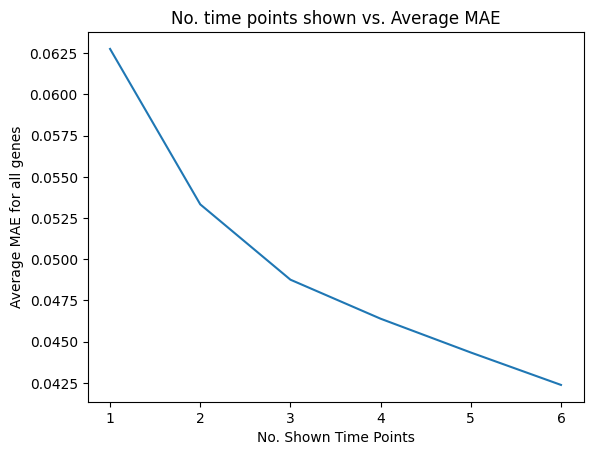

In [66]:
plt.title(f"No. time points shown vs. Average MAE")
plt.plot([1, 2, 3, 4, 5, 6], [avg_val_6, avg_val_5, avg_val_4, avg_val_3, avg_val_2, avg_val_1])
plt.xlabel('No. Shown Time Points')
plt.ylabel('Average MAE for all genes')
plt.show()


In [45]:
# Calculate correlation for predicted and truth value for all genes, at a specific time point
def correlation_combination_timepoint(n, database=all_data, model=hybrid_model, encoded=False, printB=False):
  model.eval()

  # y_truth = np.zeros(len(bulks_adata.var))
  # y_pred = np.zeros(len(bulks_adata.var))

  combinations = generate_combintations(n)

  r_values = []
  r2_values = []

  with torch.no_grad():
    for comb in combinations:
      r_vals = 0
      r2_vals = 0

      for sequence in comb:
        y_true_seq = np.zeros(len(bulks_adata.var))
        y_pred_seq = np.zeros(len(bulks_adata.var))

        for i in range(len(bulks_adata.var)):
          formatted_input = database[i]

          masked, y = mask(sequence, formatted_input)
          masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

          zeros_X = torch.nan_to_num(masked, nan=0.0, neginf=0.0)
          _, prediction = model(zeros_X)

          y_true_seq[i] = y.item()
          y_pred_seq[i] = prediction.item()

        r = scipy.stats.pearsonr(y_true_seq, y_pred_seq)[0]
        r_vals += r
        r2_vals += r**2

      r_values.append(r_vals/len(comb))
      r2_values.append(r2_vals/len(comb))


      if printB:
        print(f'R for time point(s) {comb[0]}: {r}')
        print(f'R^2 for time point(s) {comb[0]}: {r**2}')
        print()

  r_values = np.array(r_values)
  r2_values = np.array(r2_values)

  avg_r2 = r2_values.sum()/len(r2_values)

  if printB: print(f'Average R^2: {avg_r2}')
  r_vals_minmax = (r_values - r_values.min()) / (r_values.max() - r_values.min())

  return r_values, avg_r2

In [46]:
r_vals_1, avg_1 = correlation_combination_timepoint(1, printB=True, encoded=True)

R for time point(s) [0]: 0.9030340449420594
R^2 for time point(s) [0]: 0.8154704863244173

R for time point(s) [1]: 0.7753165103171937
R^2 for time point(s) [1]: 0.6011156911704312

R for time point(s) [2]: 0.8560693442460549
R^2 for time point(s) [2]: 0.7328547221578704

R for time point(s) [3]: 0.6758553226749631
R^2 for time point(s) [3]: 0.45678041718807844

R for time point(s) [4]: 0.7221855551449876
R^2 for time point(s) [4]: 0.521551976060074

R for time point(s) [5]: 0.45884625796173045
R^2 for time point(s) [5]: 0.21053988844548288

R for time point(s) [6]: 0.5463096627195414
R^2 for time point(s) [6]: 0.2984542475807391

Average R^2: 0.5195382041324418


In [47]:
r_vals_2, avg_2 = correlation_combination_timepoint(2, printB=True, encoded=True)

R for time point(s) [0, 1]: 0.7960398663410988
R^2 for time point(s) [0, 1]: 0.6336794688043544

R for time point(s) [0, 2]: 0.8565332609659599
R^2 for time point(s) [0, 2]: 0.7336492271409812

R for time point(s) [0, 3]: 0.6508166018957469
R^2 for time point(s) [0, 3]: 0.4235622493031271

R for time point(s) [0, 4]: 0.6911323472073063
R^2 for time point(s) [0, 4]: 0.4776639213562806

R for time point(s) [0, 5]: 0.4179974878680097
R^2 for time point(s) [0, 5]: 0.17472189986396694

R for time point(s) [0, 6]: 0.5012408588550733
R^2 for time point(s) [0, 6]: 0.2512423985857715

R for time point(s) [1, 2]: 0.8505989521908126
R^2 for time point(s) [1, 2]: 0.7235185774681083

R for time point(s) [1, 3]: 0.6658577358385347
R^2 for time point(s) [1, 3]: 0.44336652437601987

R for time point(s) [1, 4]: 0.7129059299091282
R^2 for time point(s) [1, 4]: 0.5082348648995988

R for time point(s) [1, 5]: 0.4445436183477457
R^2 for time point(s) [1, 5]: 0.19761902861370617

R for time point(s) [1, 6]:

In [48]:
r_vals_3, avg_3 = correlation_combination_timepoint(3, printB=True, encoded=True)

R for time point(s) [0, 2, 1]: 0.8627102115593075
R^2 for time point(s) [0, 2, 1]: 0.7442689091287051

R for time point(s) [0, 3, 1]: 0.654262522609625
R^2 for time point(s) [0, 3, 1]: 0.4280594484915101

R for time point(s) [0, 4, 1]: 0.6966085859974861
R^2 for time point(s) [0, 4, 1]: 0.485263522085417

R for time point(s) [0, 5, 1]: 0.42512514174243937
R^2 for time point(s) [0, 5, 1]: 0.18073138614152917

R for time point(s) [0, 6, 1]: 0.508389299889692
R^2 for time point(s) [0, 6, 1]: 0.2584596802423311

R for time point(s) [0, 3, 2]: 0.6379638568046753
R^2 for time point(s) [0, 3, 2]: 0.4069978825890962

R for time point(s) [0, 4, 2]: 0.6921730949248195
R^2 for time point(s) [0, 4, 2]: 0.47910359333780317

R for time point(s) [0, 5, 2]: 0.40831723974204304
R^2 for time point(s) [0, 5, 2]: 0.16672296827056104

R for time point(s) [0, 6, 2]: 0.49979013305174647
R^2 for time point(s) [0, 6, 2]: 0.24979017709588244

R for time point(s) [0, 4, 3]: 0.6799960867034078
R^2 for time point(

In [ ]:
r_vals_4, avg_4 = correlation_combination_timepoint(4, printB=True, encoded=True)

R for time point(s) [0, 3, 2, 1]: 0.6707226658928344
R^2 for time point(s) [0, 3, 2, 1]: 0.4498688945423907

R for time point(s) [0, 4, 2, 1]: 0.7211915187554079
R^2 for time point(s) [0, 4, 2, 1]: 0.5201172067247318

R for time point(s) [0, 5, 2, 1]: 0.45847141928783314
R^2 for time point(s) [0, 5, 2, 1]: 0.2101960423038001

R for time point(s) [0, 6, 2, 1]: 0.5399829053499248
R^2 for time point(s) [0, 6, 2, 1]: 0.2915815380701458

R for time point(s) [0, 4, 3, 1]: 0.6972344459979674
R^2 for time point(s) [0, 4, 3, 1]: 0.48613587268609243

R for time point(s) [0, 5, 3, 1]: 0.4167543336750899
R^2 for time point(s) [0, 5, 3, 1]: 0.17368417463696817

R for time point(s) [0, 6, 3, 1]: 0.5008394887299236
R^2 for time point(s) [0, 6, 3, 1]: 0.25084019347125125

R for time point(s) [0, 5, 4, 1]: 0.41743314465876113
R^2 for time point(s) [0, 5, 4, 1]: 0.1742504302597022

R for time point(s) [0, 6, 4, 1]: 0.5020521692067086
R^2 for time point(s) [0, 6, 4, 1]: 0.25205638060516156

R for time po

In [ ]:
r_vals_5, avg_5 = correlation_combination_timepoint(5, printB=True, encoded=True)

In [ ]:
r_vals_6, avg_6 = correlation_combination_timepoint(6, printB=True, encoded=True)

In [ ]:
plt.title(f"No. time points shown vs. Average R^2")
plt.plot([1, 2, 3, 4, 5, 6], [avg_6, avg_5, avg_4, avg_3, avg_2, avg_1], color='red')
plt.xlabel('No. Shown Time Points')
plt.ylabel('Average R^2 for all genes')
plt.show()

In [ ]:
# torch.save(model.state_dict(), "model_allTS_latentspace63_64x32.pth")

In [ ]:
# X_train_note_tensor = torch.tensor(X_train_note, dtype=torch.float32) # X train no TE to tensor
# encoded_X_train_loader_note = auto_encoder.encoder(X_train_note_tensor) # Latent space rep. of X train with no TE

# encoded_X_train_loader_note = encoded_X_train_loader_note.detach().numpy() # Make into np array

# encoded_X_train_loader_withTE = [] # Latent space representation with time embeddings
# all_encoded = []

# for i in range(len(encoded_X_train_loader_note)):
#   encoded_X_train_loader_withTE.append(np.concatenate((encoded_X_train_loader_note[i], time_embeddings)))
#   all_encoded.append(np.concatenate((encoded_X_train_loader_note[i], time_embeddings)))

In [ ]:
# X_test_note_tensor = torch.tensor(X_test_note, dtype=torch.float32) # X train no TE to tensor
# encoded_X_test_loader_note = auto_encoder.encoder(X_test_note_tensor) # Latent space rep. of X train with no TE

# encoded_X_test_loader_note = encoded_X_test_loader_note.detach().numpy() # Make into np array

# for i in range(len(encoded_X_test_loader_note)):
#   all_encoded.append(np.concatenate((encoded_X_test_loader_note[i], time_embeddings)))

In [ ]:
# latent_space_X_train_loader = [] # Loader for latent space rep. Use this to train NN

# random.shuffle(encoded_X_train_loader_withTE)
# X_train_loader1 = gen_loader(encoded_X_train_loader_withTE, 1)

# random.shuffle(encoded_X_train_loader_withTE)
# X_train_loader2 = gen_loader(encoded_X_train_loader_withTE, 2)

# random.shuffle(encoded_X_train_loader_withTE)
# X_train_loader3 = gen_loader(encoded_X_train_loader_withTE, 3)

# random.shuffle(encoded_X_train_loader_withTE)
# X_train_loader4 = gen_loader(encoded_X_train_loader_withTE, 4)

# random.shuffle(encoded_X_train_loader_withTE)
# X_train_loader5 = gen_loader(encoded_X_train_loader_withTE, 5)

# random.shuffle(encoded_X_train_loader_withTE)
# X_train_loader6 = gen_loader(encoded_X_train_loader_withTE, 6)

# latent_space_X_train_loader.extend(X_train_loader6)
# latent_space_X_train_loader.extend(X_train_loader5)
# latent_space_X_train_loader.extend(X_train_loader4)
# latent_space_X_train_loader.extend(X_train_loader3)
# latent_space_X_train_loader.extend(X_train_loader2)
# latent_space_X_train_loader.extend(X_train_loader1)

# random.shuffle(latent_space_X_train_loader)

In [ ]:
# print(len(latent_space_X_train_loader))

134414


In [ ]:
# print(latent_space_X_train_loader[1000])

In [ ]:
# class NeuralNetwork(nn.Module):
#     def __init__(self, input_size, output_size):
#         super().__init__()
#         self.linear_relu_stack = nn.Sequential(
#             nn.Linear(input_size, 64),
#             nn.ReLU(),
#             nn.Linear(64, 32),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(32, output_size),
#         )

#     def forward(self, x):
#         logits = self.linear_relu_stack(x)
#         return logits

In [ ]:
# model = NeuralNetwork(64, 1)

# # loss_fn = nn.MSELoss()
# loss_fn = torch.nn.L1Loss(reduction='none')
# # optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=0.00001)

# optimizer = optim.SGD(model.parameters(), lr=0.00001, momentum=0.9)
# scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [ ]:
# train_model_combination(model, latent_space_X_train_loader, optimizer, loss_fn, epochs=2)

Epoch 0: Loss = 0.27018919587135315
Epoch 1: Loss = 0.28148114681243896


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
